# PROJET ML ‚Äî CLASSIFICATION DE VID√âOS YOUTUBE *TRENDING*

**Dataset Kaggle**: https://www.kaggle.com/datasets/datasnaek/youtube-new

**Objectif**: D√©velopper un classificateur pour pr√©dire si une vid√©o YouTube deviendra *trending*.

> Ce notebook est con√ßu pour √™tre compl√©t√©. Chaque section contient des consignes d√©taill√©es et des zones de code √† compl√©ter.


## 1. Importation des librairies

**Consigne 1.1 ‚Äî Importez toutes les librairies n√©cessaires**
- `pandas`, `numpy` pour la manipulation de donn√©es  
- `matplotlib.pyplot`, `seaborn` pour la visualisation  
- `sklearn` pour le machine learning  
- `warnings` pour supprimer les avertissements

In [163]:
# VOTRE CODE ICI - Section 1.1
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sl
# Suppression des warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Chargement et exploration des donn√©es

**Consigne 2.1 ‚Äî Chargement des donn√©es**
- Chargez le fichier `USvideos.csv` avec pandas  
- Affichez les 5 premi√®res lignes  
- Affichez les informations g√©n√©rales (`info()`, `shape`, `describe()`)

*Aide* :
- Utilisez `pd.read_csv()` avec `encoding='utf-8'`
- `.info()` donne les types de colonnes et valeurs non-nulles
- `.describe()` donne les statistiques descriptives

In [164]:
# VOTRE CODE ICI - Section 2.1

df= pd.read_csv('USvideos.csv', encoding='utf-8')
print("Premi√®res lignes:")
display(df.head(1))
print("\nInformations g√©n√©rales:")
# <class 'pandas.core.frame.DataFrame'> : - DataFrame ‚Üí class (le plan fourni par pandas pour cr√©er des tableaux)
#                                           DataFrame est la classe : elle d√©finit toutes les m√©thodes possibles (head(), describe(), shape, info(), etc.).
#                                          - df ‚Üí object (ton tableau concret cr√©√© avec ce plan)
#                                            df est un objet : tu peux l‚Äôutiliser, l‚Äôafficher, filtrer des lignes, calculer des moyennes‚Ä¶
display(df.info())
print("Shape:", df.shape)
# Le tableau contient 40949 lignes et 16 colonnes
display(df.describe(include='all').transpose())
# Avec include='all' on demande √† pandas d‚Äôessayer d‚Äôinclure toutes les colonnes (num√©riques, texte/objets, dates, bool√©ens, cat√©gories) sinon seulement les colonnes num√©riques
# Avec .transpose(), chaque ligne correspond √† une colonne du DataFrame et chaque colonne correspond √† une m√©trique. C‚Äôest souvent plus lisible quand tu as beaucoup de colonnes.

Premi√®res lignes:


video_id trending_date                               title  \
0  2kyS6SvSYSE      17.14.11  WE WANT TO TALK ABOUT OUR MARRIAGE   

  channel_title  category_id              publish_time             tags  \
0  CaseyNeistat           22  2017-11-13T17:13:01.000Z  SHANtell martin   

    views  likes  dislikes  comment_count  \
0  748374  57527      2966          15954   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   

   ratings_disabled  video_error_or_removed  \
0             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...


Informations g√©n√©rales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  409

None

Shape: (40949, 16)


count unique  \
video_id                  40949   6351   
trending_date             40949    205   
title                     40949   6455   
channel_title             40949   2207   
category_id             40949.0    NaN   
publish_time              40949   6269   
tags                      40949   6055   
views                   40949.0    NaN   
likes                   40949.0    NaN   
dislikes                40949.0    NaN   
comment_count           40949.0    NaN   
thumbnail_link            40949   6352   
comments_disabled         40949      2   
ratings_disabled          40949      2   
video_error_or_removed    40949      2   
description               40379   6901   

                                                                      top  \
video_id                                                      j4KvrAUjn6c   
trending_date                                                    17.14.11   
title                          WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
channel_title                                                        ESPN   
category_id                                                           NaN   
publish_time                                     2018-05-18T14:00:04.000Z   
tags                                                               [none]   
views                                                                 NaN   
likes                                                                 NaN   
dislikes                                                              NaN   
comment_count                                                         NaN   
thumbnail_link             https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg   
comments_disabled                                                   False   
ratings_disabled                                                    False   
video_error_or_removed                                              False   
description             ‚ñ∫ Listen LIVE: http://power1051fm.com/\n‚ñ∫ Face...   

                         freq            mean             std    min  \
video_id                   30             NaN             NaN    NaN   
trending_date             200             NaN             NaN    NaN   
title                      30             NaN             NaN    NaN   
channel_title             203             NaN             NaN    NaN   
category_id               NaN       19.972429        7.568327    1.0   
publish_time               50             NaN             NaN    NaN   
tags                     1535             NaN             NaN    NaN   
views                     NaN  2360784.638257  7394113.759704  549.0   
likes                     NaN    74266.702435   228885.338209    0.0   
dislikes                  NaN     3711.400889    29029.705945    0.0   
comment_count             NaN     8446.803683    37430.486994    0.0   
thumbnail_link             30             NaN             NaN    NaN   
comments_disabled       40316             NaN             NaN    NaN   
ratings_disabled        40780             NaN             NaN    NaN   
video_error_or_removed  40926             NaN             NaN    NaN   
description                58             NaN             NaN    NaN   

                             25%       50%        75%          max  
video_id                     NaN       NaN        NaN          NaN  
trending_date                NaN       NaN        NaN          NaN  
title                        NaN       NaN        NaN          NaN  
channel_title                NaN       NaN        NaN          NaN  
category_id                 17.0      24.0       25.0         43.0  
publish_time                 NaN       NaN        NaN          NaN  
tags                         NaN       NaN        NaN          NaN  
views                   242329.0  681861.0  1823157.0  225211923.0  
likes                     5424.0   18091.0    55417.0    5613827.0  
dislikes                   202.0     631.0     1938.0    1674420.0  
comment_count

**Consigne 2.2 ‚Äî Analyse des valeurs manquantes**  
- Comptez les valeurs manquantes par colonne  
- Identifiez les colonnes avec le plus de valeurs manquantes  
- Affichez le pourcentage de valeurs manquantes

In [165]:
# VOTRE CODE ICI - Section 2.2
# #Valeurs manquantes
missing = df.isna().sum() #isna() est similaire √† isnull() par contre isna() est la nouvelle convention pandas
#Valeurs manquantes en pourcentage = 1.39 % 
pct_missing = (missing / len(df)) * 100
print("Valeurs manquantes (nombre):")
display(missing)
print("\nValeurs manquantes (pourcentage):")
display(pct_missing)

Valeurs manquantes (nombre):


video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64


Valeurs manquantes (pourcentage):


video_id                  0.000000
trending_date             0.000000
title                     0.000000
channel_title             0.000000
category_id               0.000000
publish_time              0.000000
tags                      0.000000
views                     0.000000
likes                     0.000000
dislikes                  0.000000
comment_count             0.000000
thumbnail_link            0.000000
comments_disabled         0.000000
ratings_disabled          0.000000
video_error_or_removed    0.000000
description               1.391975
dtype: float64

**Consigne 2.3 ‚Äî Exploration des cat√©gories**  
- Chargez le fichier JSON des cat√©gories (`US_category_id.json`)  
- Fusionnez avec le DataFrame principal  
- Affichez la distribution des cat√©gories

*Aide* : La structure JSON est du type:  
`{"items": [{"id": "1", "snippet": {"title": "Film & Animation"}}, ...]}`

In [166]:
# VOTRE CODE ICI - Section 2.3
import pandas as pd
import json
categories_raw = pd.read_json('US_category_id.json') # Transforme le fichier Json imbriqu√© en DataFrame
print(type(categories_raw['items'])) # type series Pandas (colonne d'un tableau avec son index): on peut utiliser certaine m√©thode : .mean(), .describe(), .isna()
items = categories_raw['items'].tolist() # Transforme une Series pandas (colonne avec index) en liste Python (juste les valeurs, plus simple).
print(type(items)) # liste Python = juste les valeurs, sans index, sans m√©thodes pandas avanc√©es : Pas de .mean(), .describe(), .isna() sur une liste ‚Üí tu dois tout programmer toi-m√™me.
display(items)
category_dict = {int(item['id']): item['snippet']['title'] for item in items} # On transforme la cl√© item['id']string en int, ensuite on boucle afin d'extraire chaque valeur item['title'] et son ID
print(category_dict)
cat_df = pd.DataFrame(list(category_dict.items()), columns=['category_id', 'category_title'])

        # .items() ‚Üí r√©cup√®re toutes les paires cl√©/valeur d‚Äôun dictionnaire.
        # list(...) ‚Üí transforme √ßa en une liste de tuples.
        # pd.DataFrame(...) ‚Üí transforme cette liste en tableau (DataFrame).
        # columns=[...] ‚Üí donne des noms clairs aux colonnes.
        # Donc au lieu d‚Äôavoir un dictionnaire, on a un tableau pandas pr√™t pour l‚Äôanalyse de donn√©es.
"""
dict = parfait pour acc√©der rapidement √† une valeur avec une cl√©.
DataFrame = parfait pour analyser, trier, fusionner avec d‚Äôautres donn√©es.
Un DataFrame pandas est comme une table Excel :tu peux trier,filtrer,fusionner avec d‚Äôautres donn√©es,sauvegarder facilement en CSV, JSON, SQL, etc.
category_dict = version ‚ÄúPython pure‚Äù (rapide, simple)
cat_df = version ‚Äúpandas‚Äù (pr√™te pour l‚Äôanalyse et la manipulation tabulaire)
On fait √ßa car pandas travaille avec des DataFrames."""

df_merged = df.merge(       # Prends df, on lui ajoute les colonnes de cat_df en utilisant la correspondance entre les category_id.
    cat_df,                 # le tableau avec lequel on fusionne
    how='left',             # type de jointure
    left_on='category_id',  # table de gauche
    right_on='category_id'  # table de droite
    )

print("Distribution des cat√©gories:")
display(df_merged['category_title'] # on veut un tableau qui te dit combien de vid√©os par cat√©gorie
        .value_counts()             # fait un d√©nombrement des valeurs uniques sur category_title.
        .to_frame('count')          # transforme le r√©sultat en DataFrame avec une colonne nomm√©e "count".
        )


<class 'pandas.core.series.Series'>
<class 'list'>


[{'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
  'id': '1',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Film & Animation',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
  'id': '2',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Autos & Vehicles',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
  'id': '10',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Music',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
  'id': '15',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Pets & Animals',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHe

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}
Distribution des cat√©gories:


count
category_title              
Entertainment           9964
Music                   6472
Howto & Style           4146
Comedy                  3457
People & Blogs          3210
News & Politics         2487
Science & Technology    2401
Film & Animation        2345
Sports                  2174
Education               1656
Pets & Animals           920
Gaming                   817
Travel & Events          402
Autos & Vehicles         384
Nonprofits & Activism     57
Shows                     57

## 3. Nettoyage des donn√©es

**Consigne 3.1 ‚Äî Nettoyage des donn√©es**
- Supprimez les doublons bas√©s sur `video_id`  
- G√©rez les valeurs manquantes dans `description` (remplacez par string vide)  
- Convertissez `publish_time` en datetime  
- Supprimez les lignes avec des valeurs aberrantes (ex: `views` n√©gatives)

In [167]:
# VOTRE CODE ICI - Section 3.1
df_clean = df_merged.drop_duplicates(subset='video_id').copy() # Supprimez les doublons bas√©s sur `video_id` 
df_clean['description'] = df_clean['description'].fillna('') # Remplacer les valeurs manquantes de la colonne description par une string vide

""" Actuellement le format actuelle sur df_clean est sous forme : 2017-11-13T17:13:01.000Z, c'est le format format ISO 8601. 
    Pandas le consid√®re comme un objet. 
    Pour faire des calculs sur les dates (trier, filtrer, extraire l‚Äôann√©e, le mois‚Ä¶), il faut la convertir en datetime.
"""
print(df_clean['publish_time'].dtype)

# Convertissez `publish_time` en datetime  
df_clean['publish_time'] =  pd.to_datetime(df_clean['publish_time'], errors='coerce') 
"""
errors='coerce' est tr√®s utile pour : 
- Nettoyer des colonnes num√©riques avec des cha√Ænes ‚Äúsales‚Äù. 
- Transformer des dates mal format√©es en datetime  Ex: ["2023-01-01", "invalide", "2023-03-15"] -> 2023-01-01 NaT(Not a Time) 2023-03-15.
- Eviter que pandas bloque avec une erreur.

"""
df_clean = df_clean.dropna(subset=['publish_time']) # sert √† supprimmer les lignes o√π publish_time est manquant (NaT apr√®s conversion en datetime).

# Supprimez les lignes avec des valeurs aberrantes (ex: `views` n√©gatives)
df_clean = df_clean[(df_clean['views'] >= 0) & (df_clean['likes'] >= 0) & (df_clean['dislikes'] >= 0) & (df_clean['comment_count'] >= 0)]
print((df_clean.select_dtypes(include='number') < 0).sum()) #On v√©rifie dans les colonnes de type number s'il y'a des valeurs n√©gatifs



object
category_id      0
views            0
likes            0
dislikes         0
comment_count    0
dtype: int64


## 4. Feature Engineering

Le Feature Engineering (ou cr√©ation de variables) est l‚Äôart de transformer et enrichir les donn√©es brutes pour que les mod√®les de Machine Learning puissent mieux apprendre.

Pourquoi c‚Äôest important ?
- Les mod√®les ne comprennent que les nombres. Ils ne savent pas deviner des relations ou des patterns complexes dans des colonnes brutes (ex : des   
  dates, des textes ou des cat√©gories).

- De bonnes features am√©liorent la performance du mod√®le.

- De mauvaises features peuvent faire baisser la pr√©cision ou m√™me tromper le mod√®le.

**Consigne 4.1 ‚Äî Variables d'engagement**
** d√©finition : https://support.google.com/youtube/answer/2991785?hl=fr**

Les m√©triques d'engagement sur YouTube (vues, "J'aime", "Je n'aime pas" et abonnements) repr√©sentent le nombre d'interactions enregistr√©es sur une vid√©o ou une cha√Æne. Elles constituent un indicateur important pour mesurer la popularit√© g√©n√©rale de votre vid√©o ou de votre cha√Æne.

In [168]:
# VOTRE CODE ICI - Section 4.1
import numpy as np
eps = 1e-9       # eps = 0.000000001 est une valeur tr√®s petite pour √©viter la division par z√©ro. Ex: si views = 0, Python plante avec ZeroDivisionError.

# Nombre total de r√©actions (likes + dislikes).
denom = df_clean['likes'] + df_clean['dislikes'] 

# Ratio de "like" par rapport aux interactions
df_clean['like_ratio'] = np.where(denom > 0, df_clean['likes'] / denom, 0)
"""
    np.where(condition, valeur_si_vrai, valeur_si_faux) ‚Üí √©quivalent d‚Äôun if vectoris√© :
    Si denom > 0 ‚Üí calculer likes / denom
    Sinon ‚Üí mettre 0 (aucune interaction)

"""
# Taux d‚Äôengagement global
df_clean['engagement_rate'] = np.where(df_clean['views'] > 0,
                                      (df_clean['likes'] + df_clean['dislikes'] + df_clean['comment_count']) / (df_clean['views'] + eps),
                                       0)
"""
    Avec la condition views > 0, eps n‚Äôest pas strictement n√©cessaire.
    eps est l√† pour pr√©venir toute division par z√©ro accidentelle, notamment dans des calculs plus complexes ou sur des colonnes float,
    il peut y avoir des vues tr√®s proches de z√©ro ou des flottants arrondis √† z√©ro (0.0).

"""
# Commentaires par vue
df_clean['comments_per_view'] = np.where(df_clean['views'] > 0, df_clean['comment_count'] / (df_clean['views'] + eps), 0)

display(df_clean)

video_id trending_date  \
0      2kyS6SvSYSE      17.14.11   
1      1ZAPwfrtAFY      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      puqaWrEC7tY      17.14.11   
4      d380meD0W0M      17.14.11   
...            ...           ...   
40760  dS5Thrl-4Kc      18.14.06   
40761  JGm9Y_hFqNk      18.14.06   
40762  6h8QgZF5Qu4      18.14.06   
40764  mpnshdmtE2Y      18.14.06   
40766  yz7Xq3T0YPs      18.14.06   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40760                      CRAYOLA MAKEUP | HIT OR MISS?   
40761  First Take reacts: Kyrie Irving says contract ...   
40762  Drop the Mic w/ Ashton Kutcher & Sean Diddy Combs   
40764  Carla Makes BA Smashburgers | From the Test Ki...   
40766  Katherine Langford on 13 Reasons Why, Australi...   

                              channel_title  category_id  \
0                              CaseyNeistat           22   
1                           LastWeekTonight           24   
2                              Rudy Mancuso           23   
3                     Good Mythical Morning           24   
4                                  nigahiga           24   
...                                     ...          ...   
40760                             Laura Lee           26   
40761                                  ESPN           17   
40762  The Late Late Show with James Corden           24   
40764                           Bon App√©tit           26   
40766                     Jimmy Kimmel Live           24   

                   publish_time  \
0     2017-11-13 17:13:01+00:00   
1     2017-11-13 07:30:00+00:00   
2     2017-11-12 19:05:24+00:00   
3     2017-11-13 11:00:04+00:00   
4     2017-11-12 18:01:41+00:00   
...                         ...   
40760 2018-06-12 18:55:26+00:00   
40761 2018-06-13 15:06:08+00:00   
40762 2018-06-13 05:27:27+00:00   
40764 2018-06-12 16:03:58+00:00   
40766 2018-06-13 09:00:06+00:00   

                                                    tags    views   likes  \
0                                        SHANtell martin   748374   57527   
1      last week tonight trump presidency|"last week ...  2418783   97185   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3      rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   
...                                                  ...      ...     ...   
40760  Laura88Lee|"crayola"|"crayon makeup"|"crayola ...   607422   26166   
40761  espn|"espn live"|"boston celtics"|"kyrie irvin...   812832    7701   
40762  The Late Late Show|"Late Late Show"|"James Cor...   864189   18811   
40764  bon appetit|"burgers"|"cheeseburgers"|"how to ...   540149   14206   
40766  jimmy|"kimmel"|"live"|"late"|"night"|"talk"|"s...   296295    8157   

       dislikes  comment_count  \
0          2966          15954   
1          6146          12703   
2          5339           8181   
3           666           2146   
4          1989          17518   
...         ...            ...   
40760       895           3517   
40761       320           2505   
40762       399           1074   
40764       693           1211   
40766       294            764   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   
1      https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg              False   

### Visualiser les top N vid√©os par m√©trique


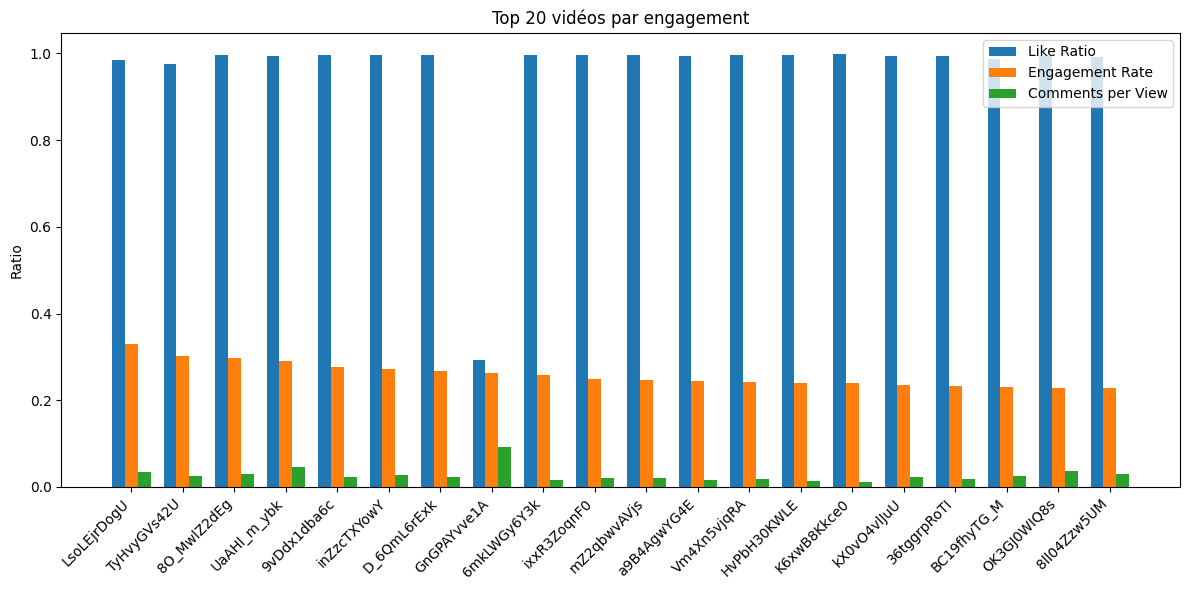

In [169]:

# Trier par engagement_rate et garder les 20 meilleures
top_videos = df_clean.sort_values('engagement_rate', ascending=False).head(20)

# Bar plot
plt.figure(figsize=(12,6))
x = np.arange(len(top_videos['video_id']))
width = 0.25

plt.bar(x - width, top_videos['like_ratio'], width, label='Like Ratio')
plt.bar(x, top_videos['engagement_rate'], width, label='Engagement Rate')
plt.bar(x + width, top_videos['comments_per_view'], width, label='Comments per View')

plt.xticks(x, top_videos['video_id'], rotation=45, ha='right')
plt.ylabel('Ratio')
plt.title('Top 20 vid√©os par engagement')
plt.legend()
plt.tight_layout()
plt.show()


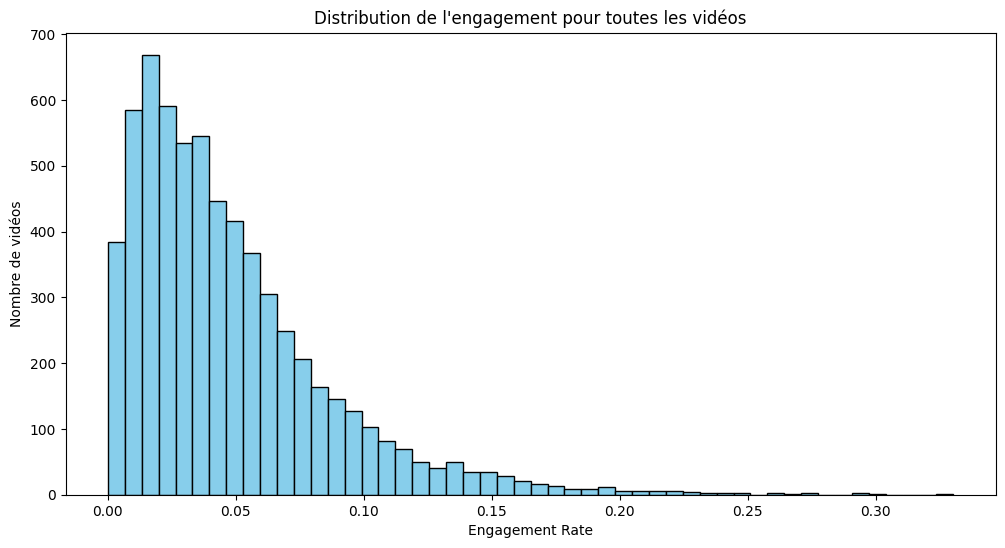

In [170]:
# Distribution g√©n√©rale avec histogrammes pour voir toutes les vid√©os
plt.figure(figsize=(12,6))
plt.hist(df_clean['engagement_rate'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Engagement Rate')
plt.ylabel('Nombre de vid√©os')
plt.title('Distribution de l\'engagement pour toutes les vid√©os')
plt.show()


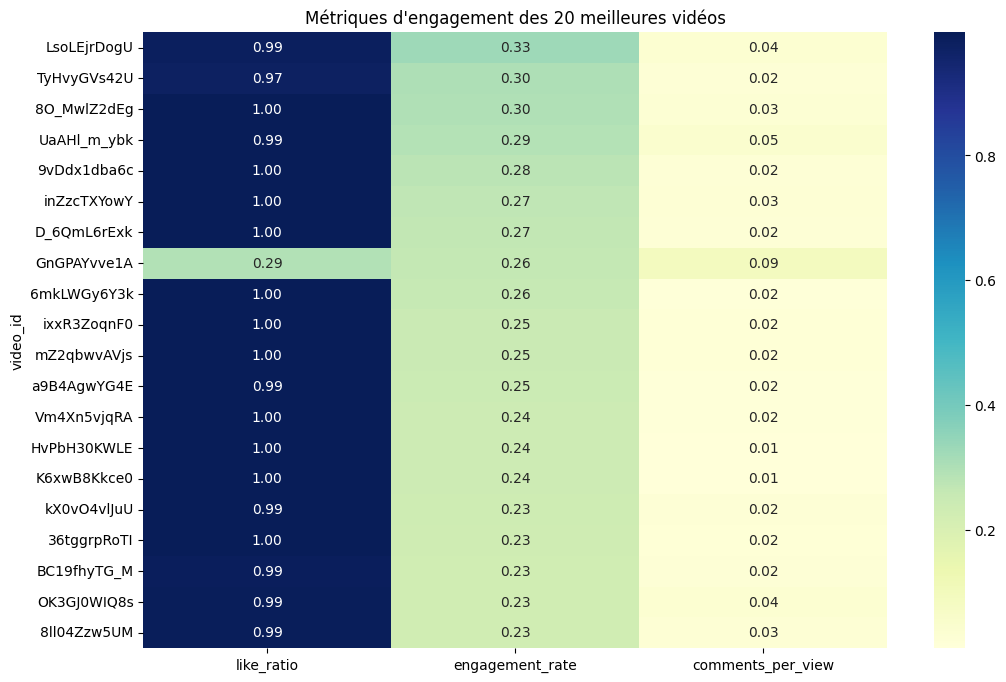

In [171]:
# Top 20 heatmap : on compare toutes les m√©triques ensemble pour les meilleures vid√©os :

top_videos_metrics = top_videos[['video_id', 'like_ratio', 'engagement_rate', 'comments_per_view']]
top_videos_metrics = top_videos_metrics.set_index('video_id')

plt.figure(figsize=(12,8))
sb.heatmap(top_videos_metrics, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('M√©triques d\'engagement des 20 meilleures vid√©os')
plt.show()


**Consigne 4.2 ‚Äî Variables temporelles** : 

Elles permettent de :

Analyser la saisonnalit√© :
Quels mois ou jours g√©n√®rent le plus d‚Äôengagement ?

Analyser les tendances :
L‚Äôengagement augmente-t-il avec le temps ?
Extraire des parties du temps pour mieux comprendre le comportement des utilisateurs :Heure de publication, jour de la semaine, mois, trimestre, ann√©e,etc.

In [172]:
# VOTRE CODE ICI - Section 4.2
df_clean['publish_hour'] = df_clean['publish_time'].dt.hour
df_clean['publish_day_of_week'] = df_clean['publish_time'].dt.day_of_week
df_clean['publish_month'] = df_clean['publish_time'].dt.month
display(df_clean[['publish_day_of_week','publish_time']])

"""
L‚Äôid√©e, c‚Äôest de rendre l‚Äôinformation plus exploitable pour l‚Äôanalyse et la mod√©lisation.
1. Faciliter les regroupements et visualisations

Si tu veux savoir quel jour de la semaine les vid√©os sont le plus souvent publi√©es :
  Tu ne peux pas directement grouper sur une colonne publish_time (trop granulaire, chaque date est unique).
  Mais si tu cr√©es publish_day_of_week, tu peux faire un simple groupby et un barplot. 

Les algorithmes de ML ne savent pas deviner tout seuls que dans une date il y a une saisonnalit√©, des jours de la semaine, etc.
On d√©compose publish_time en features pour donner ces indices au mod√®le.

publish_hour ‚Üí capter si les vid√©os publi√©es le soir performent mieux.
publish_day_of_week ‚Üí voir si les vid√©os de tel jour attirent plus.
publish_month ‚Üí analyser la saisonnalit√©.
"""

df_clean['publish_hour'] = df_clean['publish_time'].dt.hour
df_clean['publish_day_of_week'] = df_clean['publish_time'].dt.day_of_week
df_clean['publish_month'] = df_clean['publish_time'].dt.month
display(df_clean[['publish_day_of_week','publish_time']])
print((df_clean['publish_month'] == 7).sum())

publish_day_of_week              publish_time
0                        0 2017-11-13 17:13:01+00:00
1                        0 2017-11-13 07:30:00+00:00
2                        6 2017-11-12 19:05:24+00:00
3                        0 2017-11-13 11:00:04+00:00
4                        6 2017-11-12 18:01:41+00:00
...                    ...                       ...
40760                    1 2018-06-12 18:55:26+00:00
40761                    2 2018-06-13 15:06:08+00:00
40762                    2 2018-06-13 05:27:27+00:00
40764                    1 2018-06-12 16:03:58+00:00
40766                    2 2018-06-13 09:00:06+00:00

[6351 rows x 2 columns]

publish_day_of_week              publish_time
0                        0 2017-11-13 17:13:01+00:00
1                        0 2017-11-13 07:30:00+00:00
2                        6 2017-11-12 19:05:24+00:00
3                        0 2017-11-13 11:00:04+00:00
4                        6 2017-11-12 18:01:41+00:00
...                    ...                       ...
40760                    1 2018-06-12 18:55:26+00:00
40761                    2 2018-06-13 15:06:08+00:00
40762                    2 2018-06-13 05:27:27+00:00
40764                    1 2018-06-12 16:03:58+00:00
40766                    2 2018-06-13 09:00:06+00:00

[6351 rows x 2 columns]

4


### Visualisation en rapport avec le temps

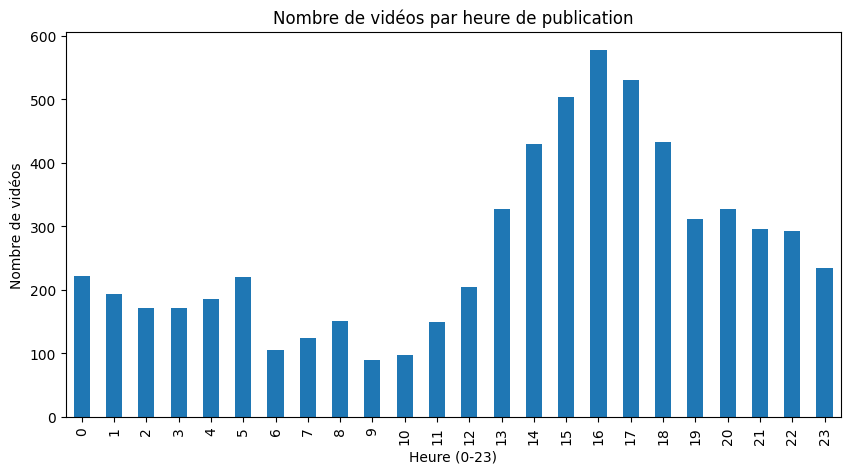

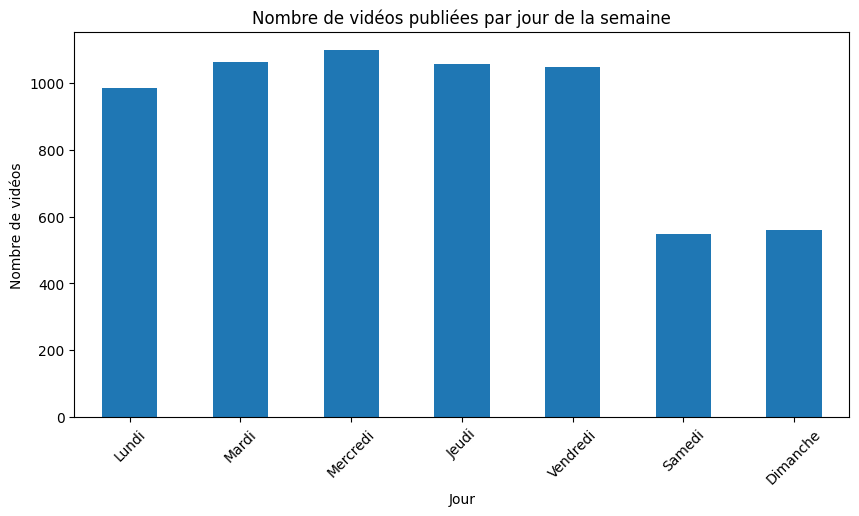

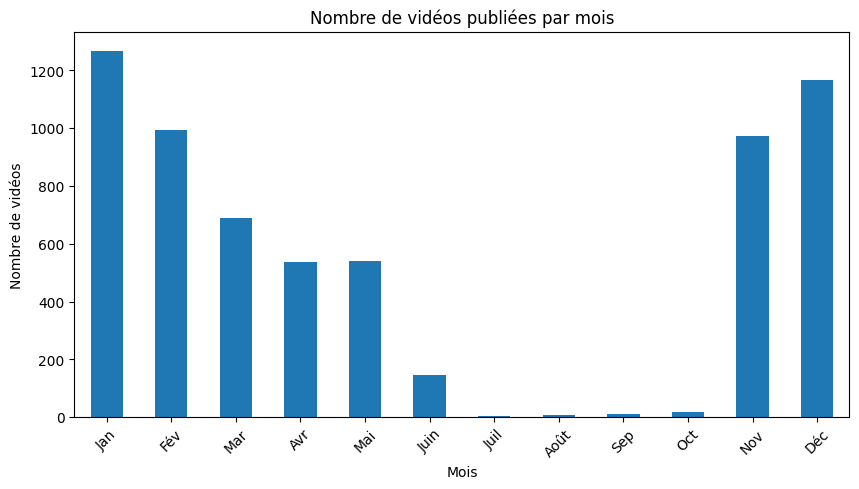

In [173]:
import matplotlib.pyplot as plt

# Histogramme : Nombre de vid√©os par heure
plt.figure(figsize=(10,5))
df_clean['publish_hour'].value_counts().sort_index().plot(kind='bar')
plt.title("Nombre de vid√©os par heure de publication")
plt.xlabel("Heure (0-23)")
plt.ylabel("Nombre de vid√©os")
plt.show()

# Histogramme : Nombre de vid√©os par jour de la semaine
jours = ['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche']
plt.figure(figsize=(10,5))
df_clean['publish_day_of_week'].value_counts().sort_index().plot(kind='bar')
plt.title("Nombre de vid√©os publi√©es par jour de la semaine")
plt.xlabel("Jour")
plt.ylabel("Nombre de vid√©os")
plt.xticks(range(7), jours, rotation=45)
plt.show()

mois = ['Jan','F√©v','Mar','Avr','Mai','Juin','Juil','Ao√ªt','Sep','Oct','Nov','D√©c']

# Comptage par mois, avec reindex pour inclure tous les mois 1 √† 12
counts = df_clean['publish_month'].value_counts().sort_index().reindex(range(1,13), fill_value=0)

plt.figure(figsize=(10,5))
counts.plot(kind='bar')
plt.title("Nombre de vid√©os publi√©es par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de vid√©os")
plt.xticks(range(12), mois, rotation=45)
plt.show()


**Consigne 4.3 ‚Äî Variables textuelles (titre)**

In [174]:
# VOTRE CODE ICI - Section 4.3
s = df_clean['title'].fillna('')  # √©vite que 'NaN' soit compt√© comme texte

# Longueur du titre (en caract√®res)
df_clean['title_length'] = s.str.len() # calcule la longueur en caract√®res de chaque titre

# Nombre de mots dans le titre
df_clean['title_word_count'] = (s.str
                    .split()           # coupe chaque titre en mots (par d√©faut sur les espaces) 
                    .str               # un ‚Äúacc√®s sp√©cial‚Äù qui te donne plein de m√©thodes de cha√Ænes de caract√®res, mais appliqu√©es √† toute la colonne d‚Äôun coup.
                    .len())            # compte combien d‚Äô√©l√©ments dans cette liste

# Pr√©sence de ¬´ beaucoup ¬ª de majuscules (plus de 3)
df_clean['has_caps'] = (s.str.contains(r'[A-Z]{3,}', regex=True) # v√©rifie si le titre contient au moins 3 lettres MAJUSCULES cons√©cutives.
                        .astype(int))                            # convertit True/False en 1/0.

# Pr√©sence de chiffres dans le titre
df_clean['has_numbers'] = (s.str.contains(r'\d', regex=True)     # v√©rifie si le titre contient des chiffres
                           .astype(int))                         # convertit True/False en 1/0.


#### Explication des features cr√©√©es : ####

title_length
‚Üí Longueur du titre en caract√®res (utile pour voir si les titres courts/longs attirent plus de vues).

title_word_count
‚Üí Nombre de mots dans le titre (ex. un titre de 10 mots contre un titre de 3 mots).

has_caps
‚Üí Variable binaire : est-ce qu‚Äôun titre contient beaucoup de majuscules ? (souvent utilis√© pour attirer l‚Äôattention : "OMG YOU WON‚ÄôT BELIEVE THIS").

has_numbers
‚Üí Variable binaire : est-ce qu‚Äôun titre contient des chiffres ? (souvent li√© √† des formats type "Top 10", "5 astuces").

## 5. Cr√©ation de la variable cible  ( Target )

**Consigne 5.1 ‚Äî D√©finition de `is_trending`**  
- Une vid√©o est *trending* si elle a plus de vues que le 80e percentile de sa cat√©gorie

In [175]:
# VOTRE CODE ICI - Section 5.1
df_clean['is_trending'] = ((df_clean.groupby('category_id')['views'] # regroupe le DataFrame par category_id. Pour chaque cat√©gorie, on prend uniquement la colonne views
                                  .transform(lambda x: x > x         # renvoie un tableau de True/False indiquant si chaque vid√©o d√©passe ce seuil.
                                  .quantile(0.8)))                   # calcule le 80·µâ percentile (le seuil de "top 20%" des vues).
                                  .astype(int))                      # convertit les bool√©ens True/False en 1 et 0.

print("Distribution de la variable cible:")
display((df_clean['is_trending']
         .value_counts()        # compte combien de vid√©os ont is_trending = 0 et combien ont is_trending = 1.
         .to_frame('count')     # transforme le r√©sultat (une Series) en tableau (DataFrame) avec une colonne nomm√©e count.
         ))

Distribution de la variable cible:


count
is_trending       
0             5078
1             1273

## 6. Pr√©paration des donn√©es pour l'entra√Ænement

**Consignes 6.1 & 6.2 ‚Äî S√©lection des features & split train/test**

In [176]:
# VOTRE CODE ICI - Section 6.1 et 6.2
# import
from sklearn.model_selection import train_test_split

# selectionne les colonnes pertinentes pour pr√©dire is_trending
features = ['views', 'likes', 'dislikes', 'comment_count',
             'like_ratio', 'engagement_rate', 'title_length', 'publish_hour', 'category_id']

X = df_clean[features].copy()         # matrice des features (X)
y = df_clean['is_trending'].copy()    # variable cible (y)

#....... Split train/test ........
X_train, X_test, y_train, y_test = train_test_split (
        X, y,
        test_size = 0.2,    # 20% test, 80% train
        random_state=42,    # pour reproductibilit√©
        stratify=y          # conserve la m√™me proportion de trending/non-trending
)
# ......

print(f"Taille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")

Taille train: (5080, 9)
Taille test: (1271, 9)


### Test avec d'autres features ###

In [177]:
# from sklearn.model_selection import train_test_split

# # --- S√©lection des colonnes utiles (features) ---
# features = [
#     'views', 'likes', 'comment_count',   # colonnes num√©riques
#     'title_length', 'title_word_count', 'has_caps', 'has_numbers',  # text features
#     'publish_hour', 'publish_day_of_week', 'publish_month',         # temporelles
#     'category_id'  # cat√©gorielle
# ]

# X = df_clean[features].copy()         # matrice des features (X)
# y = df_clean['is_trending'].copy()    # variable cible (y)

# # --- Split train/test ---
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, 
#     test_size=0.2,      # 20% test, 80% train
#     random_state=42,    # pour reproductibilit√©
#     stratify=y          # conserve la m√™me proportion de trending/non-trending
# )

# print("Taille train :", X_train.shape)
# print("Taille test  :", X_test.shape)


**Consigne 6.3 ‚Äî Normalisation des donn√©es (StandardScaler)** 

Les colonnes num√©riques (views, likes, comment_count, etc.) n‚Äôont pas la m√™me √©chelle.

Exemple :

views peut aller jusqu‚Äô√† plusieurs millions

like_ratio est entre 0 et 1

publish_hour va de 0 √† 23

Si on ne normalise pas, certaines variables (comme views) vont ¬´ √©craser ¬ª les autres, car elles ont des valeurs √©normes.

scaler = StandardScaler()

On cr√©e un objet scaler, un outil qui va apprendre √† recentrer et r√©duire les donn√©es.

Concr√®tement :

il calcule la moyenne et l‚Äô√©cart-type de chaque colonne (dans num_cols) puis, il appliquera la formule :

ùëã ùë†ùëêùëéùëôùëíùëë = (ùëã ‚àí ùúá) / ùúé

o√π Œº est la moyenne et œÉ l‚Äô√©cart-type.

On entra√Æne le scaler sur le train uniquement (jamais sur le test ).


Parce qu‚Äôon doit simuler une situation r√©elle : le mod√®le ne conna√Æt pas encore les donn√©es de test.

Donc le scaler apprend uniquement √† partir de X_train.

√Ä cette √©tape, le scaler m√©morise :

la moyenne (Œº) de chaque colonne,

l‚Äô√©cart-type (œÉ) de chaque colonne.

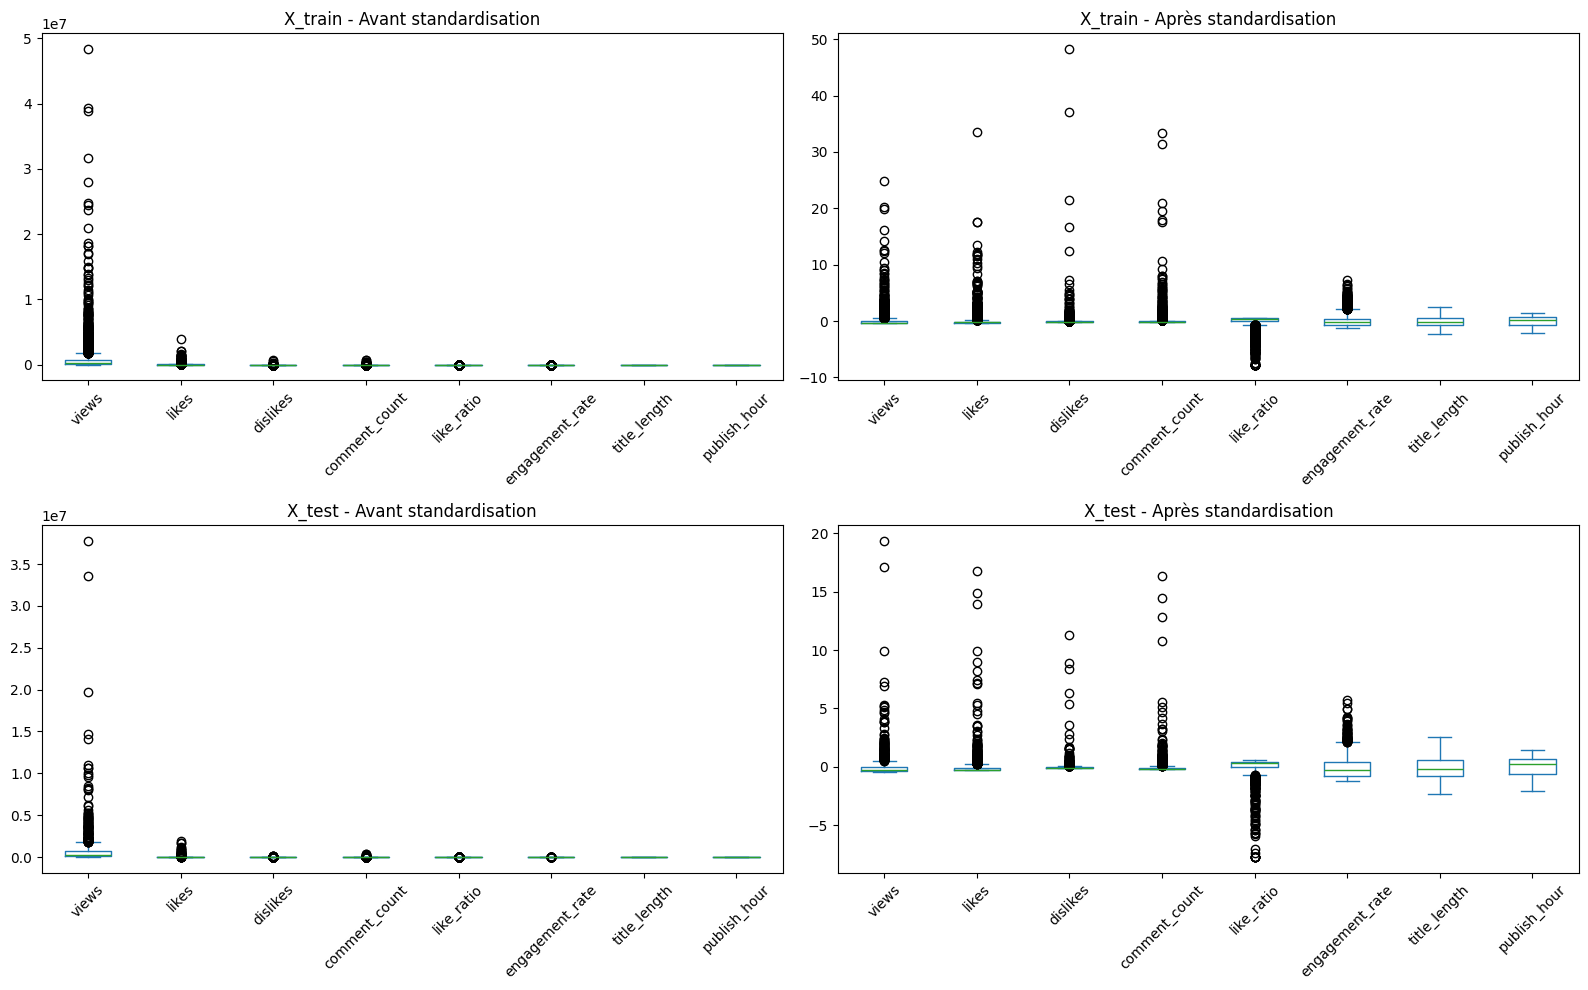

In [178]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- Ton code de normalisation ---
scaler = StandardScaler()

num_cols = ['views', 'likes', 'dislikes', 'comment_count', 
            'like_ratio', 'engagement_rate', 'title_length', 'publish_hour']

# On garde une copie "avant" pour comparer
X_train_before = X_train[num_cols].copy()
X_test_before = X_test[num_cols].copy()

# Fit uniquement sur le train
scaler.fit(X_train[num_cols])

# Transformation
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

# --- VISUALISATION ---
fig, axes = plt.subplots(2, 2, figsize=(16,10))

# Train avant
X_train_before.plot(kind="box", ax=axes[0,0])
axes[0,0].set_title("X_train - Avant standardisation")
axes[0,0].tick_params(axis='x', rotation=45)

# Train apr√®s
X_train[num_cols].plot(kind="box", ax=axes[0,1])
axes[0,1].set_title("X_train - Apr√®s standardisation")
axes[0,1].tick_params(axis='x', rotation=45)

# Test avant
X_test_before.plot(kind="box", ax=axes[1,0])
axes[1,0].set_title("X_test - Avant standardisation")
axes[1,0].tick_params(axis='x', rotation=45)

# Test apr√®s
X_test[num_cols].plot(kind="box", ax=axes[1,1])
axes[1,1].set_title("X_test - Apr√®s standardisation")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 7. Mod√®le 1 ‚Äî Random Forest

**Consigne 7.1 ‚Äî Entra√Ænement**

In [179]:
# VOTRE CODE ICI - Section 7.1
# from sklearn.ensemble import RandomForestClassifier
# ....
# ....
# ....

**Consigne 7.2 ‚Äî √âvaluation**

In [180]:
# VOTRE CODE ICI - Section 7.2
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# print("Random Forest - R√©sultats:")
# print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
# print(f"Precision: {precision_score(y_test, rf_predictions):.4f}")
# print(f"Recall: {recall_score(y_test, rf_predictions):.4f}")
# print(f"F1-Score: {f1_score(y_test, rf_predictions):.4f}")
# # Importance des variables
# import pandas as pd
# feature_importance = pd.DataFrame({
#     'feature': X.columns,
#     'importance': rf_model.feature_importances_
# }).sort_values('importance', ascending=False)
# print("\nTop 10 variables importantes:")
# display(feature_importance.head(10))

## 8. Mod√®le 2 ‚Äî Support Vector Machine (SVM)

**Consigne 8.1 ‚Äî Entra√Ænement (utiliser donn√©es normalis√©es)**

In [181]:
# VOTRE CODE ICI - Section 8.1
# from sklearn.svm import SVC
# ...
# ...
# ...

**Consigne 8.2 ‚Äî √âvaluation**

In [182]:
# VOTRE CODE ICI - Section 8.2
# print("SVM - R√©sultats:")
# print(f"Accuracy: {accuracy_score(y_test, svm_predictions):.4f}")
#....
# ...
# ...

## 9. Mod√®le 3 ‚Äî Gradient Boosting (XGBoost)

**Consigne 9.1 ‚Äî Entra√Ænement**

In [183]:
# VOTRE CODE ICI - Section 9.1
# try:
#     from xgboost import XGBClassifier
#     xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0, random_state=42, n_jobs=-1, eval_metric='logloss')
#     xgb_model.fit(X_train, y_train)
#     xgb_predictions = xgb_model.predict(X_test)
# except ImportError:
#     print("XGBoost n'est pas install√©. Installez avec: pip install xgboost")
#     xgb_model = None
#     xgb_predictions = None

**Consigne 9.2 ‚Äî √âvaluation**

In [184]:
# VOTRE CODE ICI - Section 9.2
# if xgb_predictions is not None:
#     print("XGBoost - R√©sultats:")
#     print(f"Accuracy: {accuracy_score(y_test, xgb_predictions):.4f}")
#     print(f"Precision: {precision_score(y_test, xgb_predictions):.4f}")
#     print(f"Recall: {recall_score(y_test, xgb_predictions):.4f}")
#     print(f"F1-Score: {f1_score(y_test, xgb_predictions):.4f}")

## 10. Mod√®le 4 ‚Äî R√©seau de Neurones (MLPClassifier)

**Consigne 10.1 ‚Äî Entra√Ænement (donn√©es normalis√©es)**

In [185]:
# VOTRE CODE ICI - Section 10.1
# from sklearn.neural_network import MLPClassifier
# nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
# nn_model.fit(X_train_scaled, y_train)
# nn_predictions = nn_model.predict(X_test_scaled)

**Consigne 10.2 ‚Äî √âvaluation**

In [186]:
# VOTRE CODE ICI - Section 10.2
# print("R√©seau de Neurones - R√©sultats:")
# ....
# print(f"Precision: {precision_score(y_test, nn_predictions):.4f}")
# print(f"Recall: {recall_score(y_test, nn_predictions):.4f}")
# print(f"F1-Score: {f1_score(y_test, nn_predictions):.4f}")
# # Nombre d'it√©rations
# # ....

## 11. Comparaison des mod√®les

In [187]:
# VOTRE CODE ICI - Section 11.1
# import pandas as pd
# results = []
# # Remplir en fonction des m√©triques calcul√©es plus haut
# # results.append({'Model': 'Random Forest', 'Accuracy': ..., 'Precision': ..., 'Recall': ..., 'F1-Score': ...})
# # results.append({'Model': 'SVM', 'Accuracy': ..., 'Precision': ..., 'Recall': ..., 'F1-Score': ...})
# # if xgb_predictions is not None: results.append({'Model': 'XGBoost', 'Accuracy': ..., 'Precision': ..., 'Recall': ..., 'F1-Score': ...})
# # results.append({'Model': 'Neural Network', 'Accuracy': ..., 'Precision': ..., 'Recall': ..., 'F1-Score': ...})
# results_df = pd.DataFrame(results)
# display(results_df)
# # Graphique comparatif des F1-scores (optionnel)
# # import matplotlib.pyplot as plt
# # plt.figure()
# # plt.bar(results_df['Model'], results_df['F1-Score'])
# # plt.title('Comparaison des F1-scores')
# # plt.ylabel('F1-Score')
# # plt.show()

## 12. Validation crois√©e

In [188]:
# VOTRE CODE ICI - Section 12.1
# from sklearn.model_selection import cross_val_score
# # Exemple avec Random Forest (remplacez par votre meilleur mod√®le)
# # scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
# # print(f"Validation crois√©e - F1-Score: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

## 13. Optimisation des hyperparam√®tres (Grid Search)

In [189]:
# VOTRE CODE ICI - Section 13.1
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, None],
#     'min_samples_split': [2, 5, 10]
# }
# grid_search = GridSearchCV(
#     RandomForestClassifier(random_state=42),
#     param_grid,
#     cv=3,
#     scoring='f1',
#     n_jobs=-1
# )
# grid_search.fit(X_train, y_train)
# print("Meilleurs param√®tres:", grid_search.best_params_)
# print("Meilleur score CV:", grid_search.best_score_)
# best_rf = grid_search.best_estimator_
# best_rf_pred = best_rf.predict(X_test)

## 14. Analyse des erreurs

In [190]:
# VOTRE CODE ICI - Section 14.1
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
# # Exemple: matrice de confusion pour le meilleur mod√®le (remplacez best_rf_pred)
# # cm = confusion_matrix(y_test, best_rf_pred)
# # plt.figure(figsize=(8, 6))
# # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
# #             xticklabels=['Non-Trending', 'Trending'],
# #             yticklabels=['Non-Trending', 'Trending'])
# # plt.title('Matrice de Confusion - Meilleur Mod√®le')
# # plt.ylabel('Valeurs R√©elles')
# # plt.xlabel('Pr√©dictions')
# # plt.show()

In [191]:
# VOTRE CODE ICI - Section 14.2
# # Identifier des exemples mal classifi√©s (adapter selon le mod√®le choisi)
# # errors_mask = (y_test != best_rf_pred)
# # error_indices = X_test[errors_mask].index
# # print("Exemples de vid√©os mal classifi√©es:")
# # for idx in list(error_indices)[:5]:
# #     real_label = y_test.loc[idx]
# #     predicted_label = best_rf_pred[list(error_indices).index(idx)]  # √† adapter si n√©cessaire
# #     print(f"Index {idx}: R√©el={real_label}, Pr√©dit={predicted_label}")

## 15. Sauvegarde & conclusions

In [192]:
# VOTRE CODE ICI - Section 15.1
# import joblib
# # Remplacez 'best_rf' / 'scaler' par vos objets
# # joblib.dump(best_model, 'best_youtube_classifier.pkl')
# # joblib.dump(scaler, 'feature_scaler.pkl')
# # print("Mod√®le et scaler sauvegard√©s avec succ√®s!")

### Conclusions √† r√©diger

1. **Meilleur mod√®le**  
   - Mod√®le: *[√Ä compl√©ter]*  
   - Performances: *[√Ä compl√©ter]*  
   - Raisons: *[√Ä compl√©ter]*

2. **Variables les plus importantes**  
   - *[√Ä compl√©ter]*

3. **Limitations**  
   - *[√Ä compl√©ter]*

4. **Am√©liorations sugg√©r√©es**  
   - *[√Ä compl√©ter]*

5. **Apprentissages**  
   - *[√Ä compl√©ter]*

---
## Guide de testing pour les √©tudiants

**Comment tester vos impl√©mentations :**
1. **V√©rifications de base** : `.shape`, `.info()`, `.head()`  
2. **Validation des features** : pas de NaN, ratios entre 0 et 1, plages temporelles correctes  
3. **Validation des mod√®les** : pr√©dictions binaires {0,1}, longueurs coh√©rentes, comparaisons rigoureuses  
4. **Tests de coh√©rence** : scores r√©alistes, F1 entre pr√©cision et rappel, impact de la normalisation  
5. **Debugging** : augmenter `max_iter` si n√©cessaire, v√©rifier entr√©es/sorties et dimensions